Guía en construcción 🛠

La siguiente guía hace un repaso rápido de los conceptos de álgebra lineal que más relevantes se consideran para el aprendizaje automático.

Para un repaso de propiedades, operaciones y reglas básicas: [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf).

# Nociones básicas

## Vectores

Un vector Euclideano es un objeto geométrico que tiene magnitud y dirección. Puede representarse como vector columna,

$v = 
 \begin{pmatrix}
  v_{1} \\
  v_{2} \\
  \vdots  \\
  v_{n}  
 \end{pmatrix}$
 
o vector fila,

$v^T = 
 \begin{pmatrix}
  v_{1} 
  v_{2} 
  \dots
  v_{n}  
 \end{pmatrix}$
 
siendo $^T$ la operación de transpuesta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([1,5])
u = np.array([4,2])
origen = [0,0],[0,0]

### Magnitud

La magnitud más común está dada por la norma L2 o distancia Euclideana, que representa esta distancia entre ambos lados del vector. Dado $v$, su magnitud está dada por

$$||v|| = \sqrt{v_1^2 + \dots + v_n^2}$$

también se expresa como $||v||_2$, $|v|$, $L^2$ o $\mathcal{l}^2$

### Graficación

Dados dos vectores $v$ y $u$, los mismos pueden graficarse mediante

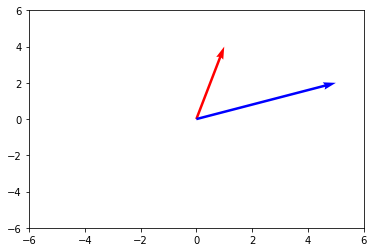

In [2]:
axes = plt.gca()
axes.set_xlim([-6,6])
axes.set_ylim([-6,6])
plt.quiver(*origen, v, u, color=['r', 'b'], angles='xy',
           scale_units='xy', scale=1)
plt.show()

### Suma de vectores

La suma de dos vectores $v$ y $u$ con igual cantidad de elementos está dada por

$v + u = 
 \begin{pmatrix}
  v_{1} + u_{1} \\
  v_{2} + u_{2} \\
  \vdots  \\
  v_{n} + u_{n}  
 \end{pmatrix}$
 
Visualmente, el resultado de esta suma es similar al vector que resulta de "adjuntar" un vector al final del otro.

### Multiplicación de vectores

#### Multiplicación escalar

Multiplicar un vector $v$ por un escalar $\alpha$ se define como

$\alpha v = 
 \begin{pmatrix}
  \alpha v_{1} \\
  \alpha v_{2} \\
  \vdots  \\
  \alpha v_{n}  
 \end{pmatrix}$
 
y extiende o contrae la magnitud del vector por $\alpha$, cambiendo su dirección si $\alpha < 0$

#### Producto punto

También llamado producto escalar, interno o *inner product* (\*), está dado por

$v \cdot u = |v||u| \cos(\theta)$ (definición geométrica)

o de forma equivalente,

$v \cdot u = \sum_{i=1}^n v_i u_i$ (definición algebraica)

el ángulo entre dos vectores está entonces dado por

$\theta = \arccos (v \cdot u / |v||u|)$ 


(\*) Un producto interno $<v,u> \to \mathbb{R} \cup \mathbb{C}$ define un producto entre dos vectores que devuelve un escalar, y en el espacio Euclideano está dado por el producto punto. Cumple condiciones y posee propiedades importantes, más info [aquí](https://en.wikipedia.org/wiki/Inner_product_space).

Algunas propiedades:

1. $\langle\alpha v,u \rangle = \alpha \langle v,u\rangle, \alpha \in \mathbb{R} \cup \mathbb{C}$

1. $v \neq 0 \implies \langle v,v \rangle > 0 $

#### Producto cruz

$v \times u = |v| |u| sin(\theta) n$

donde $n$ es el vector unitario perpendicular al plano que contiene a $u$ y $v$.

Puede obtenerse a partir del determinante:

$v \times u = 
 \begin{vmatrix}
  i & j & k \\
  v_1 & v_2 & v_3  \\
  u_1 & u_2 & u_3
 \end{vmatrix}
$

#### Producto externo

También llamado *outer product*.

$v \otimes u = u v^T$

## Matrices

Una matriz es un arreglo o tabla de números, dispuestos como filas $m$ y columnas $n$. Por ejemplo, una matriz $A$ puede expresarse como

$A(m,n) = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,m} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{n,1} & a_{n,2} & \cdots & a_{n,m}
 \end{pmatrix}
$

Cada columna y fila de la matriz puede pensarse como un vector columna o fila, de dimensiones $(n,1)$ o $(1,m)$, respectivamente.

Si $n=m$, entonces $A(n,n)$ es cuadrada.

### Algunos tipos de matrices

#### Matriz diagonal

$A$ es una matriz diagonal si es cuadrada y sólo tiene elementos distintos a 0 en su diagonal principal, es decir

$A(n,n) = 
 \begin{pmatrix}
  a_{1,1} & 0 & \cdots & 0 \\
  0 & a_{2,2} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & a_{n,n} 
 \end{pmatrix}
$

Otro tipo es la matriz diagonal rectangular, donde

$A(n,m) = 
 \begin{pmatrix}
  a_{1,1} & 0 & \cdots & 0 & \dots & 0\\
  0 & a_{2,2} & \cdots & 0 & \dots & 0\\
  \vdots  & \vdots  & \ddots & \vdots & & \vdots \\
  0 & 0 & \cdots & a_{n,n} & \dots & 0
 \end{pmatrix}
$

#### Matriz identidad

La matriz identidad está dada por

$I(n,n) = 
 \begin{pmatrix}
  1 & 0 & \cdots & 0 \\
  0 & 1 & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & 1 
 \end{pmatrix}
$

#### Matriz triangular

Una matriz triangular expresada como $L$ o $U$, es aquella matriz cuadrada en donde todas las entradas por encima o por debajo de la diagonal principal son 0, en cuyo caso se denomina como matriz triangular inferior o superior, respectivamente. El determinante de esta matriz está dado por el producto entre los elementos de su diagonal principal.

Así,

$L(n,n) = 
 \begin{pmatrix}
  a_{1,1} & 0 & \cdots & 0 \\
  a_{2,1} & a_{2,2} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
 \end{pmatrix}
$

y

$U(m,n) = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  0 & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & a_{n,n} 
 \end{pmatrix}
$

#### Matriz adjunta

#### Positiva-definida y semi-definida

Una matriz simétrica ($A(n,n)$ es simétrica si $A = A^T$) es positiva-definida si se cumple que,

$v^T A v > 0, \forall v \in \mathbb{R}^n, v \neq 0$

de forma similar, se considera positiva-semidefinida si

$v^T A v \geq 0, \forall v \in \mathbb{R}^n$

#### Matriz de permutación

Es una matriz $P$ que posee exactamente un 1 por cada fila y por cada columna, teniendo 0 en todos sus demás elementos. Multiplicar esta matriz produce una permutación en las filas o en sus columnas.

### Multiplicación de matrices

Dos matrices $A(n,p)$ y $B(p,m)$ pueden multiplicarse entre sí, produciendo una matriz $C(n,m)$,

$C(n,m) = 
 \begin{pmatrix}
  c_{1,1} & c_{1,2} & \cdots & c_{1,m} \\
  c_{2,1} & c_{2,2} & \cdots & c_{2,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  c_{n,1} & c_{n,2} & \cdots & c_{n,m} 
 \end{pmatrix}
$

donde se cumple que cada elemento está dado por $c_{i,j} = \sum_{k=1}^p a_{ik}b_{kj}$



La multiplicación de matrices es un caso de *transformación lineal*

### Inversa de una matriz

Dada una matriz cuadrada $A$, la misma es *invertible* si existe una matriz $B$ tal que

$AB = BA = I_n$

En este contexto, $B$ se denota como $A^{-1}$. Si la matriz $A$ no tiene inversa, se denomina como *matriz singular*.

#### Pseudoinversa

Existe una generalización de la inversión de matrices a matrices rectangulares $A(n,m)$ a partir de una pseudoinversa $A^+$. En ese sentido, si $A$ tiene rango completo (dado por $\min(n,m)$) entonces:

* Si $A$ tiene columnas con independencia lineal, entonces $AA^+ = I$, donde

$A^+ = (A^T A)^{-1}A^T$

* Si $A$ tiene filas con independencia lineal, entonces $A^+ A = I$, donde

$A^+ = A^T (A A^T)^{-1}$

* Si $A$ es invertible, entonces $A^+=A^{-1}$

### Determinante

El determinante de una matriz cuadrada $A$, $det(A)$ o $|A|$, es un escalar que caracteriza el volumen de la matriz y sumariza varias de sus propiedades, entre ellas:

1. $|I| = 1$
1. $|A| \neq 0 \iff \exists A^{-1}$
1. $det(A^{-1}) = det(A)^{-1}$
1. $det(AB) = det(A)det(B)$
1. $det(A^T) = det(A)$
1. $det(cA) = c^n det(A)$ ($n$ es orden de la matriz)

El determinante se calcula al multiplicar los autovalores de la matriz, y puede calcularse a partir de varios métodos. [Más información](https://en.wikipedia.org/wiki/Determinant).

Si la matriz es triangular, el determinante está dado por el producto entre los elementos de la diagonal principal.

### Traza

La traza de una matriz $A$, $tr(A)$ es la suma de todos los elementos de la diagonal principal de la matriz. 

### Rango

El rango de una matriz es el número de columnas linealmente independientes de la misma.

### Descomposiciones

Consisten en factorizar una matriz como un producto de matrices, lo cuál en muchos casos permite simplificar o conseguir estabilidad numérica al realizar operaciones sobre las mismas. Vemos las más relevantes para aprendizaje automático

#### Descomposición LU y LUP

La descomposición LU consiste en descomponer una matriz cuadrada $A$ como $A = LU$, donde $L$ y $U$ son las matrices triangulares inferior y superior, respectivamente.

También puede factorizarse como $A = LUP$, donde $P$ es la matriz de permutación. Esto hace que sea más estable numéricamente.

#### Descomposición de Cholesky

Consiste en descomponer una matriz A(n,n) simétrica y positiva-definida como

$A = LL^T$, siendo $L$ la matriz triangular menor.

#### Descomposición QR

Consiste en factorizar una matriz $A(n,m)$ en $QR$, donde $Q(n,n)$ es una matriz ortogonal (tal que $Q^T=Q^{-1}$, por lo tanto $QQ^T=I$) y $R(n,m)$ es una matriz triangular superior.

#### Autovalores y autovectores

Dada una matriz $A(n,n)$, $v$ es un *autovector* si satisface

$Av = \lambda v$

donde $\lambda$ es un escalar denominado como *autovalor*, correspondiente a $v$

Intuitivamente, $v$ es un vector que, al aplicar la transformación lineal $A$, se agranda o achica una cantidad dada por $\lambda$.

Si $A(n,n)$ puede descomponerse en $n$ autovectores linealmente independientes, entonces puede factorizarse como

$A = Q \Lambda Q^{-1}$

donde cada columna $i$ de $Q(n,n)$ es un autovector, mientras que $\Lambda$ es una matriz diagonal cuyos valores $\lambda_{ii}$ se corresponden a cada autovector $i$.

#### Decomposición en valores singulares (SVD)

*Singular value decomposition* (SVD) generaliza la descomposición en autovalores y autovectores a cualquier matriz $A(n,m)$, de forma

$A = U \Sigma V^T$

donde $U(n,n)$ y $V(n,m)$ son matrices que cumplen $UU^T = VV^T = I$ y $\Sigma(n,m)$ es una matriz diagonal rectangular, cuyos elementos $\sigma_{ii} \in \Sigma$ se denominan valores singulares.

Dada la SVD de $A$, se cumple que

$AA^T = U(\Sigma\Sigma^T)U^T$

y

$A^TA = V(\Sigma^T\Sigma)V^T$

donde las columnas de $U$ y las columnas de $V$ son autovectores de $A$, mientras que los elementos de $\Sigma$ distintos a 0 son la raíz cuadrada de los autovalores $\neq 0$ de $AA^T$ o $A^TA$.

SVD tiene una gran cantidad de usos, que incluyen el cálculo de la pseudoinversa, resolución de mínimos cuadrados, resolución de ecuaciones, reducción de dimensionalidad, entre otros.

# Aplicaciones

## Análisis de componentes principales

A grandes rasgos, el análisis de componentes principales consiste en proyectar un subconjunto de columnas de datos a un nuevo sistema de coordenadas, de modo que la primera coordenada capture la mayor proporción de la varianza de los datos, la segunda coordenada capture la segunda mayor, y así sucesivamente, permitiendo quitar dimensiones que no aportan a la varianza.

El objetivo entonces es encontrar una matriz de vectores de pesos/coeficientes $W(p,p)$ (cuyos vectores columna se conocen como componentes principales) que transforme a los datos $X(n,p)$ (normalizados con media 0 en cada columna) mediante

$T = XW$

donde cada fila de $T$ representa el mapeo de la correspondiente fila de $X$ para el primer, segundo y último componente principal considerado (hasta un máximo de $min(n,p)$), mientras que cada columna representa los valores de cada observación para el primer componente principal.

En $W$, cada columna/componente tiene los *loadings* del j-ésimo componente principal (con un máximo de $min(n,p)$).

Utilizando descomposición de valores singulares, es posible descomponer $X$ como

$X = U\Sigma W^T$

pudiendo computar $T$ mediante

$T = XW = U\Sigma$



Otra forma de realizar PCA es mediante la matriz de coviarianza, dada por

$S = \frac{1}{n-1}X^TX$

descomponiendo $S$ en autovalores y autovectores, siendo la varianza explicada por cada componente los primeros, y $W$ los segundos.